In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.skew()

<ipython-input-8-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [9]:
df.kurt()

<ipython-input-9-8bd0d54cd88d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

In [10]:
dfcorr = df.corr()
dfcorr

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

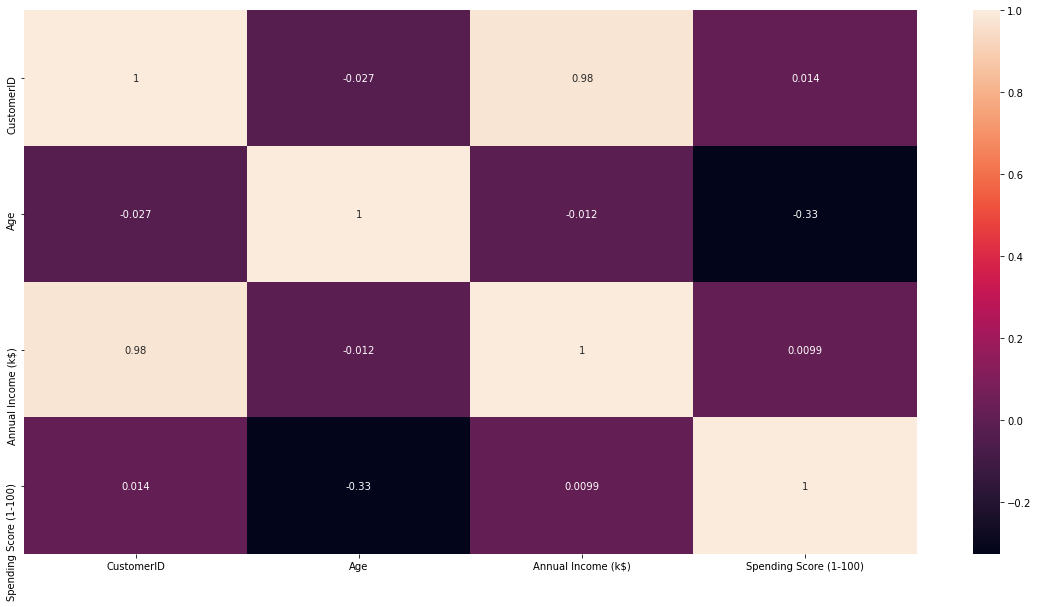

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcorr,annot=True)

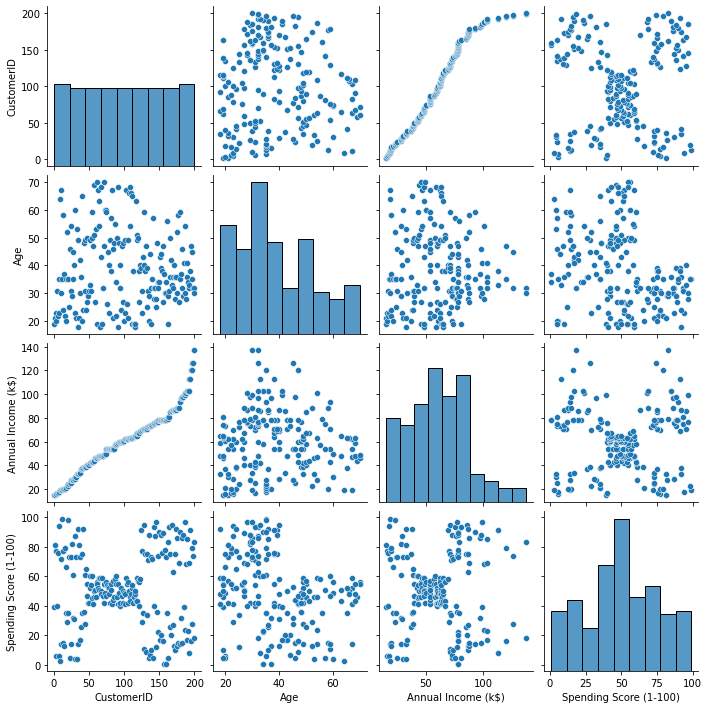

In [12]:
sns.pairplot(df)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

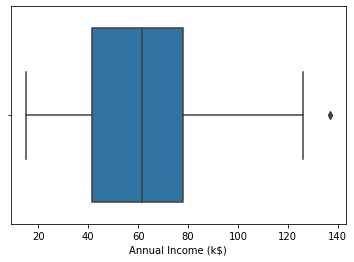

In [13]:
sns.boxplot(df['Annual Income (k$)'])

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

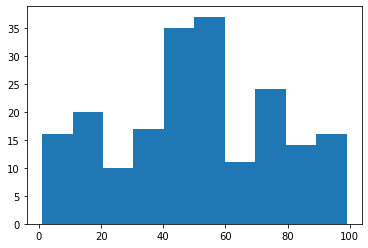

In [14]:
plt.hist(df['Spending Score (1-100)'],bins=10)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genre', ylabel='count'>

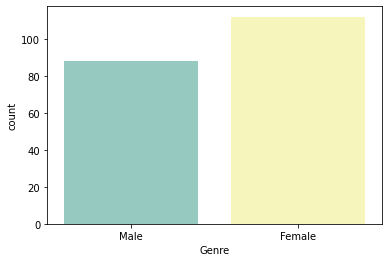

In [15]:
sns.countplot(df['Genre'],palette="Set3")

In [16]:
df.drop(columns='CustomerID',axis=1,inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


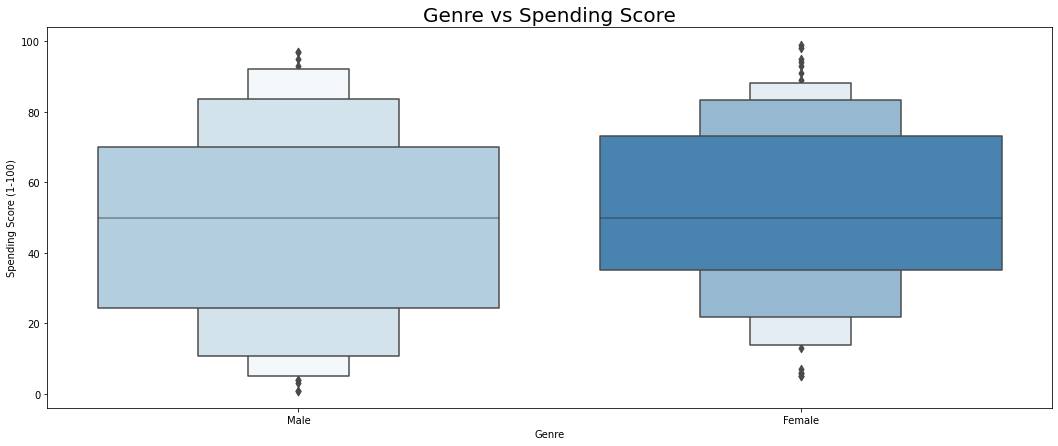

In [17]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(df['Genre'], df['Spending Score (1-100)'], palette='Blues')
plt.title('Genre vs Spending Score', fontsize=20)
plt.show()

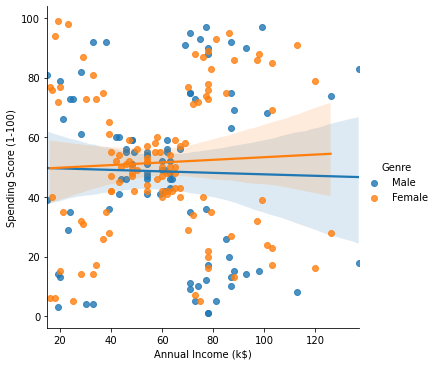

In [18]:
sns.lmplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = df, hue = "Genre")


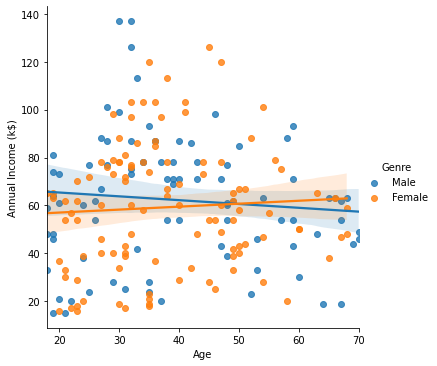

In [19]:
sns.lmplot(x = "Age", y = "Annual Income (k$)", data = df, hue = "Genre")


In [20]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [21]:
x = df.iloc[0:2]

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [24]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [25]:
y = df['Spending Score (1-100)']

In [26]:
 x = df.iloc[:,1:3] # 1t for rows and second for columns
x


,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
5,22,17
6,35,18
7,23,18
8,64,19
9,30,19


In [27]:
customer_df = pd.get_dummies(df).reset_index(drop=True)

In [28]:
from sklearn.preprocessing import StandardScaler
Sc= StandardScaler()

x= Sc.fit_transform(x)

In [29]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [30]:
from sklearn.cluster import KMeans

In [31]:
x = df.loc[:,["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
inertia = []
k = range(1,20)
for i in k:
    means_k = KMeans(n_clusters=i, random_state=0)
    means_k.fit(x)
    inertia.append(means_k.inertia_)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


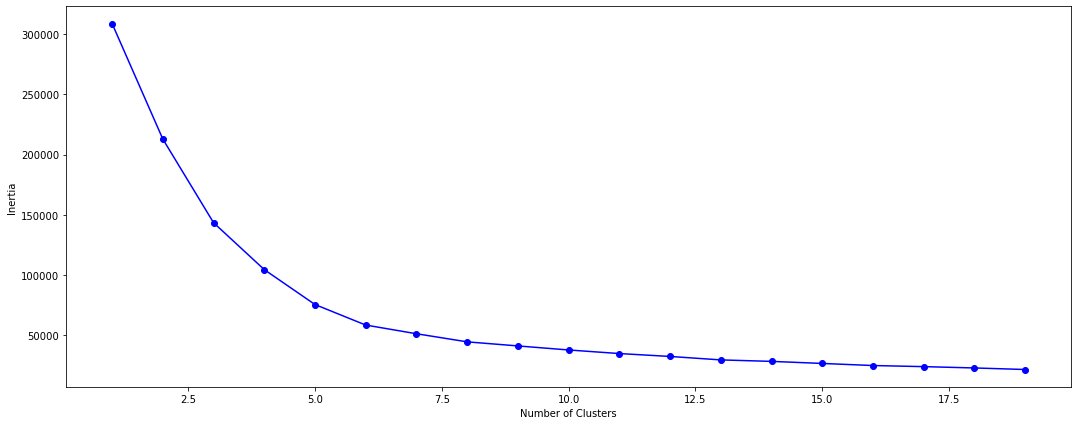

In [32]:
plt.plot(k , inertia , 'bo-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [33]:
kmeans_model=KMeans(6)
kmeans_clusters = kmeans_model.fit_predict(df)

In [34]:
from sklearn.cluster import AgglomerativeClustering

In [35]:
agglo_model = AgglomerativeClustering(linkage="ward",n_clusters=6)
agglomerative_clusters = agglo_model.fit_predict(customer_df)

In [36]:
from sklearn.mixture import GaussianMixture



In [37]:
GaussianMixture_model = GaussianMixture(n_components=6)
gmm_clusters = GaussianMixture_model.fit_predict(customer_df)

In [38]:
from sklearn.cluster import DBSCAN

In [39]:
model_dbscan = DBSCAN(eps=3, min_samples=17)
dbscan_clusters = model_dbscan.fit_predict(df)

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
def silhouette_method(df,algo,y_pred):
  print('=================================================================================')
  print('Clustering ',algo," : silhouette score : ",silhouette_score(df,y_pred) )


silhouette_method(customer_df,' : KMeans',kmeans_clusters)
silhouette_method(customer_df,' : Agglomerative',agglomerative_clusters)
silhouette_method(customer_df,' : GaussianMixture',gmm_clusters)
print('=================================================================================')

Clustering   : KMeans  : silhouette score :  0.45205475380756527
Clustering   : Agglomerative  : silhouette score :  0.4428008535928764
Clustering   : GaussianMixture  : silhouette score :  0.44554665984545394
